In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv(r'C:\caminho-do-arquivo\lgbt-rights-index.csv')

In [5]:
df

,Entity,Code,Year,LGBT+ Policy Index
0,Afghanistan,AFG,1991,-1.390096
1,Afghanistan,AFG,1992,-1.428308
2,Afghanistan,AFG,1993,-1.428308
3,Afghanistan,AFG,1994,-1.428308
4,Afghanistan,AFG,1995,-1.390096
...,...,...,...,...
5940,Zimbabwe,ZWE,2015,-2.325783
5941,Zimbabwe,ZWE,2016,-2.325783
5942,Zimbabwe,ZWE,2017,-2.325783
5943,Zimbabwe,ZWE,2018,-2.363995


In [6]:
df.dtypes

Entity                 object
Code                   object
Year                    int64
LGBT+ Policy Index    float64
dtype: object

In [7]:
quali = []
quanti = []

for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        quali.append(i)
    else:
        quanti.append(i)
        

In [8]:
print('Lista Qualitativa: ', quali)
print('Lista Quantitativa: ', quanti)

Lista Qualitativa:  ['Entity', 'Code']
Lista Quantitativa:  ['Year', 'LGBT+ Policy Index']


In [12]:
# Detectar dados nulos

nulos = pd.DataFrame()
nulos['Variável'] = df.columns
nulos['Quantidade'] = None
nulos['Porcentagem'] = None

In [13]:
nulos

,Variável,Quantidade,Porcentagem
0,Entity,None,None
1,Code,None,None
2,Year,None,None
3,LGBT+ Policy Index,None,None


In [14]:
for i in nulos.index:
    nulos.Quantidade[i] = df[nulos['Variável'][i]].isna().sum()
    nulos.Porcentagem[i] = (df[nulos['Variável'][i]].isna().sum() / len(df)) * 100

In [15]:
nulos

,Variável,Quantidade,Porcentagem
0,Entity,0,0.0
1,Code,319,5.365854
2,Year,0,0.0
3,LGBT+ Policy Index,0,0.0


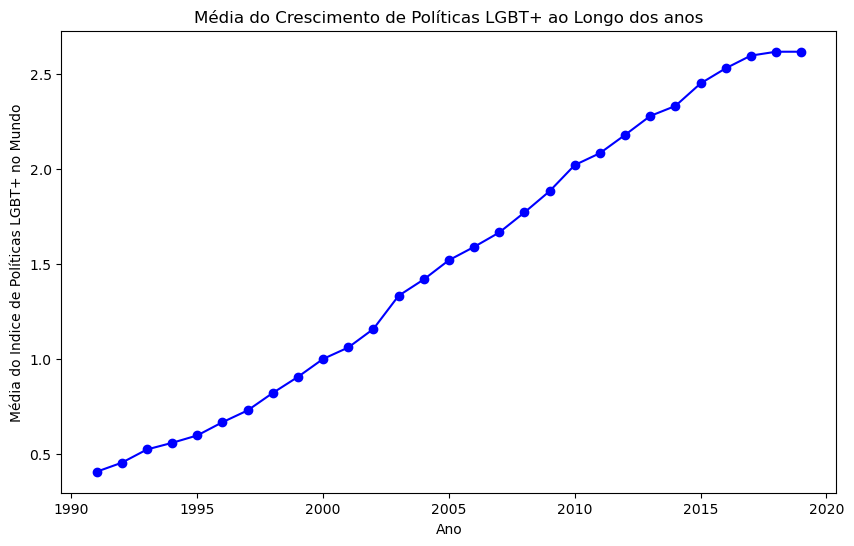

In [39]:
# Calcular a média geral do LGBT+ Policy Index para cada ano
media_por_ano = df.groupby('Year')['LGBT+ Policy Index'].mean()

# Criar um gráfico de linhas
plt.figure(figsize=(10, 6))
plt.plot(media_por_ano.index, media_por_ano.values, marker='o', linestyle='-', color='b')

# Adicionar rótulos e título
plt.xlabel('Ano')
plt.ylabel('Média do Indice de Políticas LGBT+ no Mundo')
plt.title('Média do Crescimento de Políticas LGBT+ ao Longo dos anos')

# Mostrar o gráfico
plt.show()

In [50]:
## Agrupar por um país específico:

country = 'Brazil'

df_country = df[df['Entity'] == country]

media_por_ano_brazil = df_country.groupby('Year')['LGBT+ Policy Index'].mean()

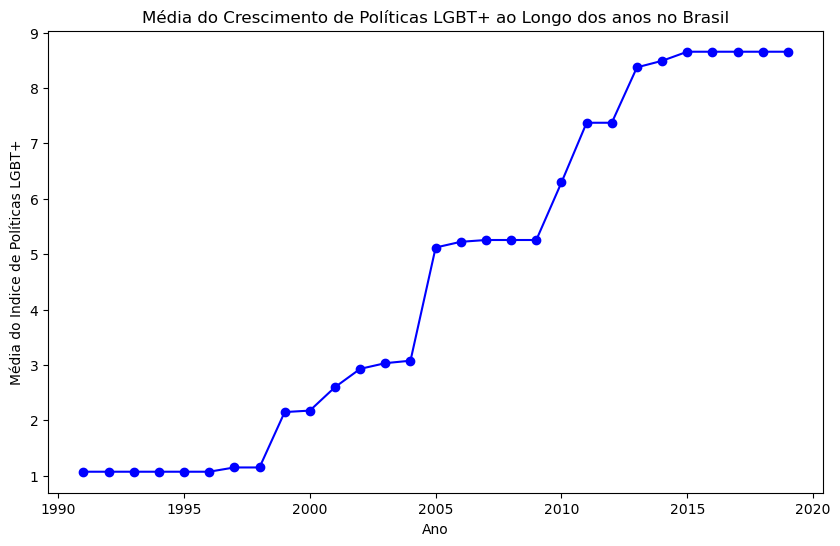

In [52]:
# Criar um gráfico de linhas
plt.figure(figsize=(10, 6))
plt.plot(media_por_ano_brazil.index, media_por_ano_brazil.values, marker='o', linestyle='-', color='b')

plt.xlabel('Ano')
plt.ylabel('Média do Indice de Políticas LGBT+')
plt.title(f'Média do Crescimento de Políticas LGBT+ ao Longo dos anos no Brasil')

plt.show()


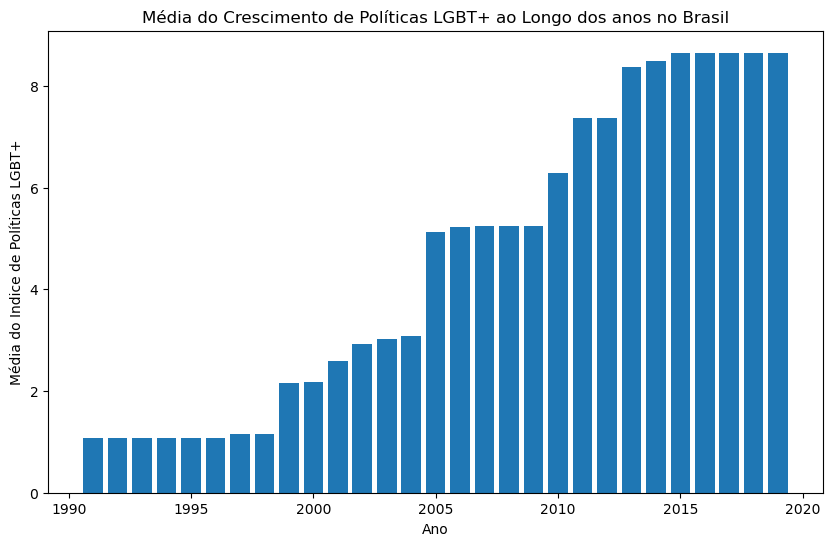

In [65]:
# Criar um gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(media_por_ano_brazil.index, media_por_ano_brazil.values)

plt.xlabel('Ano')
plt.ylabel('Média do Indice de Políticas LGBT+')
plt.title(f'Média do Crescimento de Políticas LGBT+ ao Longo dos anos no Brasil')

plt.show()

# Identificação de outliers

In [53]:
df2 = df.copy()

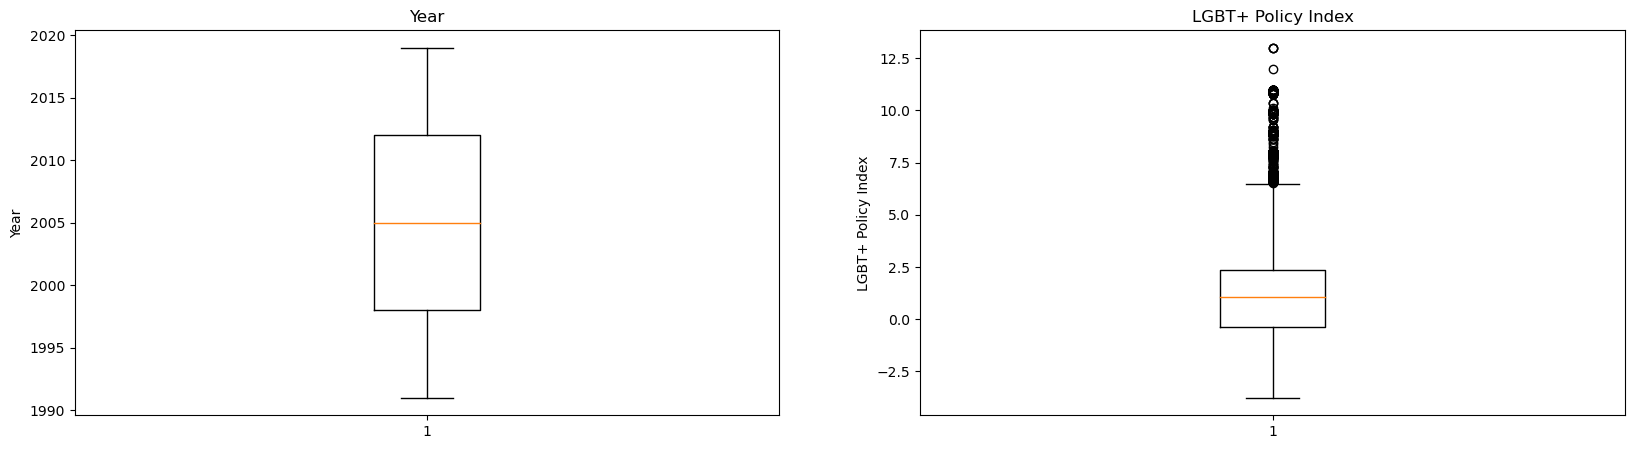

In [57]:

fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# Boxplot para 'Year'
axs[0].set_title('Year')
axs[0].boxplot(df2['Year'])
axs[0].set_ylabel('Year')  # Adicione um rótulo ao eixo y

# Boxplot para 'LGBT+ Policy Index'
axs[1].set_title('LGBT+ Policy Index')
axs[1].boxplot(df2['LGBT+ Policy Index'])
axs[1].set_ylabel('LGBT+ Policy Index')  # Adicione um rótulo ao eixo y

plt.show()

In [69]:
df2_quanti = df2[quanti]
colunas = df2_quanti.columns
outliers = []

for i in df2_quanti.columns:
    q3 = np.quantile(df2_quanti[i], 0.75)
    q1 = np.quantile(df2_quanti[i], 0.25)
    dist = q3 - q1
    lim_inf = q1 - 1.5*dist
    lim_sup = q3 + 1.5*dist
    
    print('--------------')
    print(i)
    print(dist)
    print(lim_inf)
    print(lim_sup)
    print('-------------')
    
    outlier = 0
    
    for j in df2_quanti.index:
        if df2_quanti[i][j] < lim_inf:
            outlier = outlier + 1
        elif df2_quanti[i][j] > lim_sup:
            outlier = outlier + 1
        else:
            pass
        
    outliers.append(outlier)
    
df_outlier = pd.DataFrame()
df_outlier['Variável'] = colunas
df_outlier['Outliers'] = outliers
df_outlier['Porcentagem'] = (df_outlier['Outliers'] / len(df2_quanti)) * 100

--------------
Year
14.0
1977.0
2033.0
-------------
--------------
LGBT+ Policy Index
2.76005623
-4.530180775
6.510044145
-------------


In [70]:
df_outlier

,Variável,Outliers,Porcentagem
0,Year,0,0.000000
1,LGBT+ Policy Index,422,7.098402


# Remoção dos Outliers

In [74]:
# Lista para armazenar índices de linhas que contêm outliers
indices_outliers = []

for column in df2_quanti.columns:
    q1 = df2_quanti[column].quantile(0.25)
    q3 = df2_quanti[column].quantile(0.75)
    dist = q3 - q1
    lim_inf = q1 - 1.5 * dist
    lim_sup = q3 + 1.5 * dist
    
    # Encontrar índices de linhas que contêm outliers
    indices_outliers.extend(df2_quanti[(df2_quanti[column] < lim_inf) | (df2_quanti[column] > lim_sup)].index)

# Remover linhas duplicadas dos índices (caso haja sobreposição de outliers entre variáveis)
indices_outliers = list(set(indices_outliers))

# Criar um novo DataFrame sem as linhas que contêm outliers
df_sem_outliers = df2_quanti.drop(indices_outliers)

# Imprimir o DataFrame resultante
print(df_sem_outliers)

      Year  LGBT+ Policy Index
0     1991           -1.390096
1     1992           -1.428308
2     1993           -1.428308
3     1994           -1.428308
4     1995           -1.390096
...    ...                 ...
5940  2015           -2.325783
5941  2016           -2.325783
5942  2017           -2.325783
5943  2018           -2.363995
5944  2019           -2.363995

[5523 rows x 2 columns]


# Detectar Correlação das Variáveis

<Axes: >

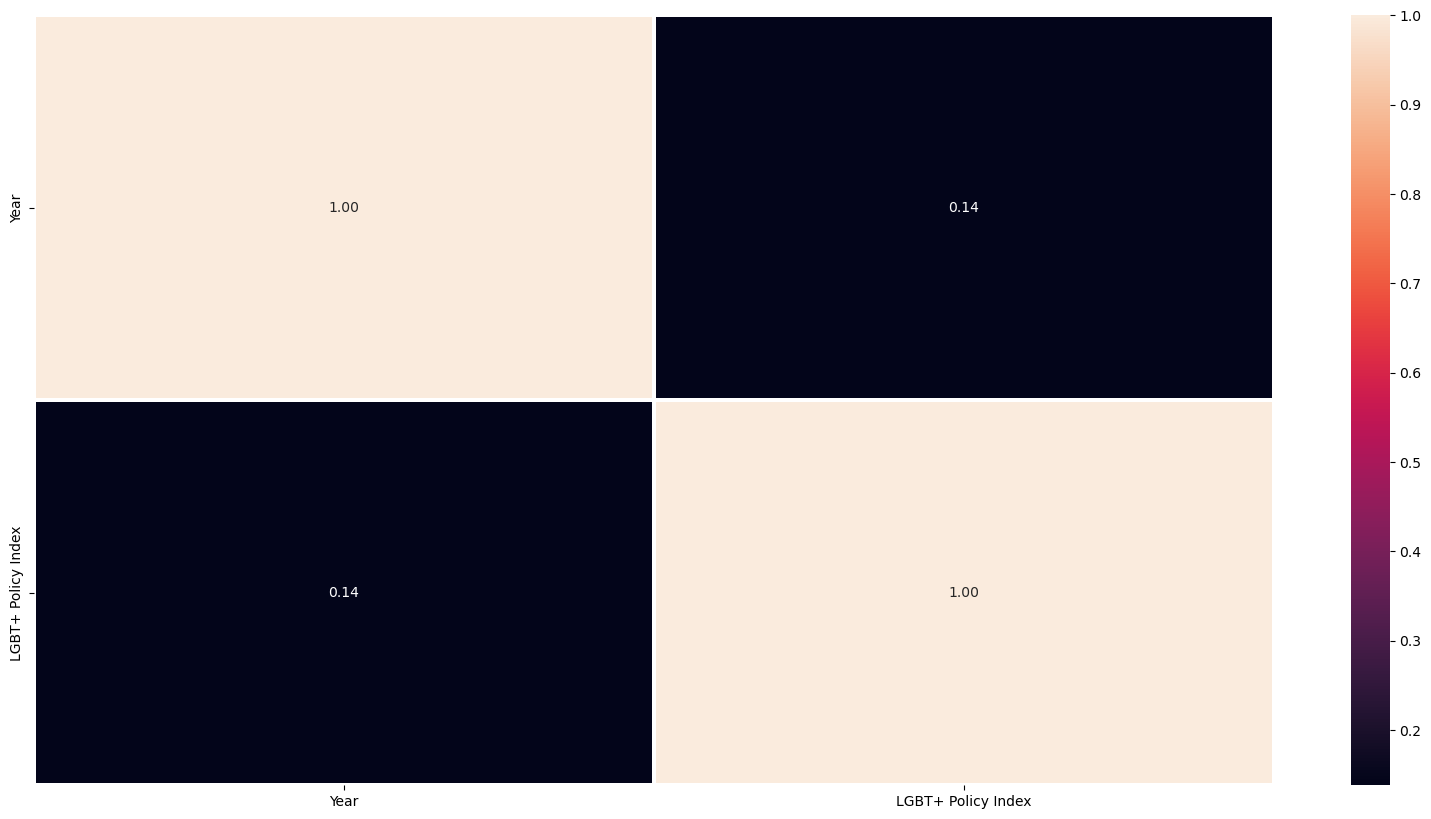

In [75]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_sem_outliers.corr(), annot = True, linewidth=1.5, fmt = '.2f')

# Rodar os graficos novamente sem os outliers

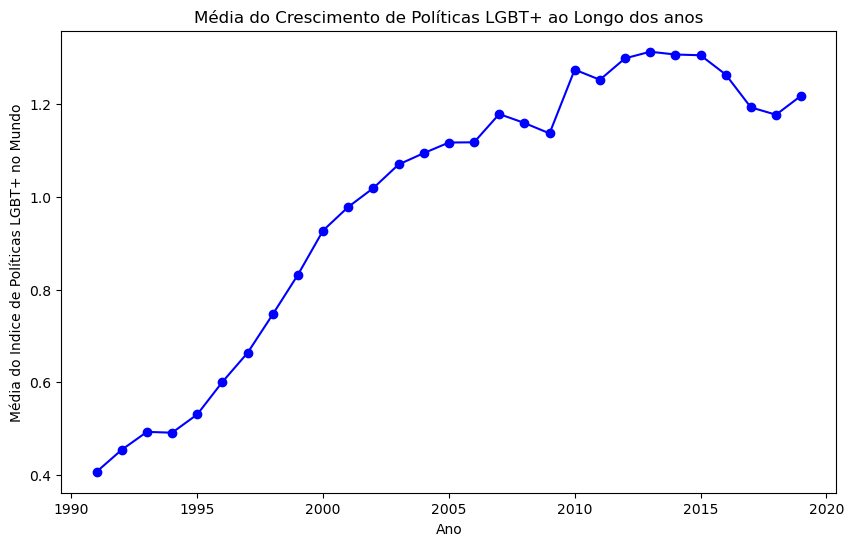

In [81]:
# Calcular a média geral do LGBT+ Policy Index para cada ano
media_por_ano1 = df_sem_outliers.groupby('Year')['LGBT+ Policy Index'].mean()

# Criar um gráfico de linhas
plt.figure(figsize=(10, 6))
plt.plot(media_por_ano1.index, media_por_ano1.values, marker='o', linestyle='-', color='b')

# Adicionar rótulos e título
plt.xlabel('Ano')
plt.ylabel('Média do Indice de Políticas LGBT+ no Mundo')
plt.title('Média do Crescimento de Políticas LGBT+ ao Longo dos anos')

# Mostrar o gráfico
plt.show()

# Grafico em barras

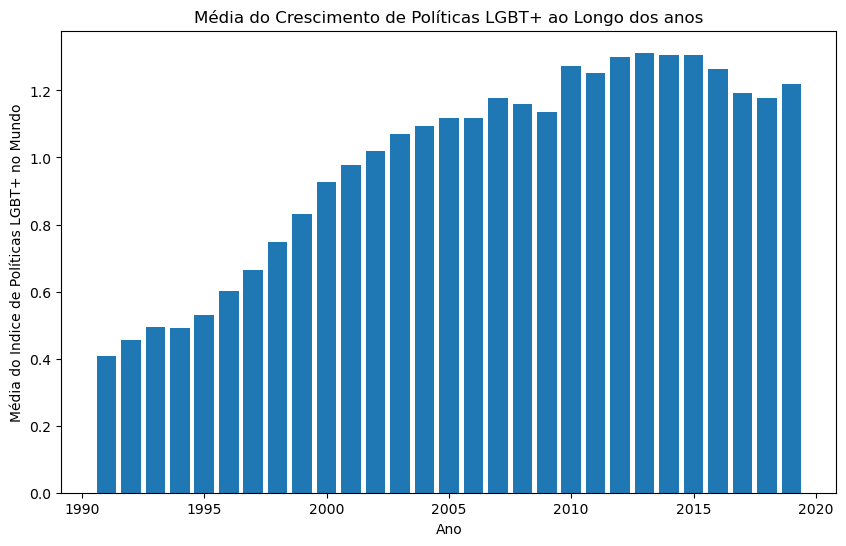

In [82]:
plt.figure(figsize=(10, 6))
plt.bar(media_por_ano1.index, media_por_ano1.values)

# Adicionar rótulos e título
plt.xlabel('Ano')
plt.ylabel('Média do Indice de Políticas LGBT+ no Mundo')
plt.title('Média do Crescimento de Políticas LGBT+ ao Longo dos anos')

# Mostrar o gráfico
plt.show()